In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 500

In [2]:
merged_df = pd.read_csv('merged_df.csv', index_col=0)

In [3]:
merged_df.kwh.describe()

count    2903.000000
mean        0.267439
std         0.285236
min         0.079000
25%         0.111000
50%         0.161000
75%         0.265000
max         2.072000
Name: kwh, dtype: float64

In [4]:
merged_df.kwh.mad()

0.1775628044159255

In [3]:
merged_df.head()

daily_date    kwh      dow  is_weekend  hour  \
date                                                                
2019-02-05 01:00:00  2019-02-05  1.968  Tuesday       False     1   
2019-02-05 02:00:00  2019-02-05  1.959  Tuesday       False     2   
2019-02-05 03:00:00  2019-02-05  1.960  Tuesday       False     3   
2019-02-05 04:00:00  2019-02-05  1.978  Tuesday       False     4   
2019-02-05 05:00:00  2019-02-05  1.892  Tuesday       False     5   

                     is_working_time  is_night_time  season      cost  \
date                                                                    
2019-02-05 01:00:00            False           True  winter  0.360197   
2019-02-05 02:00:00            False           True  winter  0.358550   
2019-02-05 03:00:00            False           True  winter  0.358733   
2019-02-05 04:00:00            False           True  winter  0.362027   
2019-02-05 05:00:00            False           True  winter  0.346287   

                     discriminative_cost horaPresMax horaPresMin horaracha  \
date                                                                         
2019-02-05 01:00:00             0.248021      Varias          17     07:12   
2019-02-05 02:00:00             0.246887      Varias          17     07:12   
2019-02-05 03:00:00             0.247013      Varias          17     07:12   
2019-02-05 04:00:00             0.249281      Varias          17     07:12   
2019-02-05 05:00:00             0.238443      Varias          17     07:12   

                    horatmax horatmin  prec  presMax  presMin  racha   sol  \
date                                                                         
2019-02-05 01:00:00    16:01    07:05   0.0   1026.1   1022.8    8.3  10.2   
2019-02-05 02:00:00    16:01    07:05   0.0   1026.1   1022.8    8.3  10.2   
2019-02-05 03:00:00    16:01    07:05   0.0   1026.1   1022.8    8.3  10.2   
2019-02-05 04:00:00    16:01    07:05   0.0   1026.1   1022.8    8.3  10.2   
2019-02-05 05:00:00    16:01    07:05   0.0   1026.1   1022.8    8.3  10.2   

                     tmax  tmed  tmin  velmedia  dir_axis_1  dir_axis_2  
date                                                                     
2019-02-05 01:00:00  20.3  11.9   3.5       1.9     0.99179    0.127877  
2019-02-05 02:00:00  20.3  11.9   3.5       1.9     0.99179    0.127877  
2019-02-05 03:00:00  20.3  11.9   3.5       1.9     0.99179    0.127877  
2019-02-05 04:00:00  20.3  11.9   3.5       1.9     0.99179    0.127877  
2019-02-05 05:00:00  20.3  11.9   3.5       1.9     0.99179    0.127877

In [4]:
merged_df.columns[merged_df.columns.str.contains('tm')]

Index(['horatmax', 'horatmin', 'tmax', 'tmed', 'tmin'], dtype='object')

In [5]:
merged_df['temp_range'] = merged_df.tmax.sub(merged_df.tmin)
merged_df['pres_range'] = merged_df.presMax.sub(merged_df.presMin)
TEMP_COLS = ['tmax', 'tmed', 'tmin']
for col in TEMP_COLS:
    merged_df[col] = merged_df[col].pow(1/2)

In [6]:
pd.get_dummies(merged_df, columns=['dow']).head()

daily_date    kwh  is_weekend  hour  is_working_time  \
date                                                                        
2019-02-05 01:00:00  2019-02-05  1.968       False     1            False   
2019-02-05 02:00:00  2019-02-05  1.959       False     2            False   
2019-02-05 03:00:00  2019-02-05  1.960       False     3            False   
2019-02-05 04:00:00  2019-02-05  1.978       False     4            False   
2019-02-05 05:00:00  2019-02-05  1.892       False     5            False   

                     is_night_time  season      cost  discriminative_cost  \
date                                                                        
2019-02-05 01:00:00           True  winter  0.360197             0.248021   
2019-02-05 02:00:00           True  winter  0.358550             0.246887   
2019-02-05 03:00:00           True  winter  0.358733             0.247013   
2019-02-05 04:00:00           True  winter  0.362027             0.249281   
2019-02-05 05:00:00           True  winter  0.346287             0.238443   

                    horaPresMax horaPresMin horaracha horatmax horatmin  prec  \
date                                                                            
2019-02-05 01:00:00      Varias          17     07:12    16:01    07:05   0.0   
2019-02-05 02:00:00      Varias          17     07:12    16:01    07:05   0.0   
2019-02-05 03:00:00      Varias          17     07:12    16:01    07:05   0.0   
2019-02-05 04:00:00      Varias          17     07:12    16:01    07:05   0.0   
2019-02-05 05:00:00      Varias          17     07:12    16:01    07:05   0.0   

                     presMax  presMin  racha   sol      tmax      tmed  \
date                                                                     
2019-02-05 01:00:00   1026.1   1022.8    8.3  10.2  4.505552  3.449638   
2019-02-05 02:00:00   1026.1   1022.8    8.3  10.2  4.505552  3.449638   
2019-02-05 03:00:00   1026.1   1022.8    8.3  10.2  4.505552  3.449638   
2019-02-05 04:00:00   1026.1   1022.8    8.3  10.2  4.505552  3.449638   
2019-02-05 05:00:00   1026.1   1022.8    8.3  10.2  4.505552  3.449638   

                         tmin  velmedia  dir_axis_1  dir_axis_2  temp_range  \
date                                                                          
2019-02-05 01:00:00  1.870829       1.9     0.99179    0.127877        16.8   
2019-02-05 02:00:00  1.870829       1.9     0.99179    0.127877        16.8   
2019-02-05 03:00:00  1.870829       1.9     0.99179    0.127877        16.8   
2019-02-05 04:00:00  1.870829       1.9     0.99179    0.127877        16.8   
2019-02-05 05:00:00  1.870829       1.9     0.99179    0.127877        16.8   

                     pres_range  dow_Friday  dow_Monday  dow_Saturday  \
date                                                                    
2019-02-05 01:00:00         3.3           0           0             0   
2019-02-05 02:00:00         3.3           0           0             0   
2019-02-05 03:00:00         3.3           0           0             0   
2019-02-05 04:00:00         3.3           0           0             0   
2019-02-05 05:00:00         3.3           0           0             0   

                     dow_Sunday  dow_Thursday  dow_Tuesday  dow_Wednesday  
date                                                                       
2019-02-05 01:00:00           0             0            1              0  
2019-02-05 02:00:00           0             0            1              0  
2019-02-05 03:00:00           0             0            1              0  
2019-02-05 04:00:00           0             0            1              0  
2019-02-05 05:00:00           0             0            1              0

In [7]:
merged_df.shape

(2903, 28)

# Creamos la matriz de predictores y la variable objetivo

In [8]:
merged_df.head()

daily_date    kwh      dow  is_weekend  hour  \
date                                                                
2019-02-05 01:00:00  2019-02-05  1.968  Tuesday       False     1   
2019-02-05 02:00:00  2019-02-05  1.959  Tuesday       False     2   
2019-02-05 03:00:00  2019-02-05  1.960  Tuesday       False     3   
2019-02-05 04:00:00  2019-02-05  1.978  Tuesday       False     4   
2019-02-05 05:00:00  2019-02-05  1.892  Tuesday       False     5   

                     is_working_time  is_night_time  season      cost  \
date                                                                    
2019-02-05 01:00:00            False           True  winter  0.360197   
2019-02-05 02:00:00            False           True  winter  0.358550   
2019-02-05 03:00:00            False           True  winter  0.358733   
2019-02-05 04:00:00            False           True  winter  0.362027   
2019-02-05 05:00:00            False           True  winter  0.346287   

                     discriminative_cost horaPresMax horaPresMin horaracha  \
date                                                                         
2019-02-05 01:00:00             0.248021      Varias          17     07:12   
2019-02-05 02:00:00             0.246887      Varias          17     07:12   
2019-02-05 03:00:00             0.247013      Varias          17     07:12   
2019-02-05 04:00:00             0.249281      Varias          17     07:12   
2019-02-05 05:00:00             0.238443      Varias          17     07:12   

                    horatmax horatmin  prec  presMax  presMin  racha   sol  \
date                                                                         
2019-02-05 01:00:00    16:01    07:05   0.0   1026.1   1022.8    8.3  10.2   
2019-02-05 02:00:00    16:01    07:05   0.0   1026.1   1022.8    8.3  10.2   
2019-02-05 03:00:00    16:01    07:05   0.0   1026.1   1022.8    8.3  10.2   
2019-02-05 04:00:00    16:01    07:05   0.0   1026.1   1022.8    8.3  10.2   
2019-02-05 05:00:00    16:01    07:05   0.0   1026.1   1022.8    8.3  10.2   

                         tmax      tmed      tmin  velmedia  dir_axis_1  \
date                                                                      
2019-02-05 01:00:00  4.505552  3.449638  1.870829       1.9     0.99179   
2019-02-05 02:00:00  4.505552  3.449638  1.870829       1.9     0.99179   
2019-02-05 03:00:00  4.505552  3.449638  1.870829       1.9     0.99179   
2019-02-05 04:00:00  4.505552  3.449638  1.870829       1.9     0.99179   
2019-02-05 05:00:00  4.505552  3.449638  1.870829       1.9     0.99179   

                     dir_axis_2  temp_range  pres_range  
date                                                     
2019-02-05 01:00:00    0.127877        16.8         3.3  
2019-02-05 02:00:00    0.127877        16.8         3.3  
2019-02-05 03:00:00    0.127877        16.8         3.3  
2019-02-05 04:00:00    0.127877        16.8         3.3  
2019-02-05 05:00:00    0.127877        16.8         3.3

In [9]:
merged_df.columns

Index(['daily_date', 'kwh', 'dow', 'is_weekend', 'hour', 'is_working_time',
       'is_night_time', 'season', 'cost', 'discriminative_cost', 'horaPresMax',
       'horaPresMin', 'horaracha', 'horatmax', 'horatmin', 'prec', 'presMax',
       'presMin', 'racha', 'sol', 'tmax', 'tmed', 'tmin', 'velmedia',
       'dir_axis_1', 'dir_axis_2', 'temp_range', 'pres_range'],
      dtype='object')

In [10]:
merged_df.columns

Index(['daily_date', 'kwh', 'dow', 'is_weekend', 'hour', 'is_working_time',
       'is_night_time', 'season', 'cost', 'discriminative_cost', 'horaPresMax',
       'horaPresMin', 'horaracha', 'horatmax', 'horatmin', 'prec', 'presMax',
       'presMin', 'racha', 'sol', 'tmax', 'tmed', 'tmin', 'velmedia',
       'dir_axis_1', 'dir_axis_2', 'temp_range', 'pres_range'],
      dtype='object')

In [11]:
MODEL_FEATURES = ['dow', 'is_weekend', 'hour', 'is_working_time',
                  'is_night_time', 'prec', 'presMax',
                  'presMin', 'racha', 'sol', 'tmax', 'tmed', 'tmin', 'velmedia',
                  'dir_axis_1', 'dir_axis_2',  'temp_range', 'pres_range' ]
X = merged_df[MODEL_FEATURES].copy()

X.is_weekend = X.is_weekend.astype('int')
X.is_working_time = X.is_working_time.astype('int')
X.is_night_time = X.is_night_time.astype('int')

DUMMY_COLS  = ['dow', 'hour']
X = pd.get_dummies(X, columns=DUMMY_COLS)

y = merged_df.kwh

In [12]:
X.shape, y.shape

((2903, 47), (2903,))

In [13]:
X.head()

is_weekend  is_working_time  is_night_time  prec  \
date                                                                    
2019-02-05 01:00:00           0                0              1   0.0   
2019-02-05 02:00:00           0                0              1   0.0   
2019-02-05 03:00:00           0                0              1   0.0   
2019-02-05 04:00:00           0                0              1   0.0   
2019-02-05 05:00:00           0                0              1   0.0   

                     presMax  presMin  racha   sol      tmax      tmed  \
date                                                                     
2019-02-05 01:00:00   1026.1   1022.8    8.3  10.2  4.505552  3.449638   
2019-02-05 02:00:00   1026.1   1022.8    8.3  10.2  4.505552  3.449638   
2019-02-05 03:00:00   1026.1   1022.8    8.3  10.2  4.505552  3.449638   
2019-02-05 04:00:00   1026.1   1022.8    8.3  10.2  4.505552  3.449638   
2019-02-05 05:00:00   1026.1   1022.8    8.3  10.2  4.505552  3.449638   

                         tmin  velmedia  dir_axis_1  dir_axis_2  temp_range  \
date                                                                          
2019-02-05 01:00:00  1.870829       1.9     0.99179    0.127877        16.8   
2019-02-05 02:00:00  1.870829       1.9     0.99179    0.127877        16.8   
2019-02-05 03:00:00  1.870829       1.9     0.99179    0.127877        16.8   
2019-02-05 04:00:00  1.870829       1.9     0.99179    0.127877        16.8   
2019-02-05 05:00:00  1.870829       1.9     0.99179    0.127877        16.8   

                     pres_range  dow_Friday  dow_Monday  dow_Saturday  \
date                                                                    
2019-02-05 01:00:00         3.3           0           0             0   
2019-02-05 02:00:00         3.3           0           0             0   
2019-02-05 03:00:00         3.3           0           0             0   
2019-02-05 04:00:00         3.3           0           0             0   
2019-02-05 05:00:00         3.3           0           0             0   

                     dow_Sunday  dow_Thursday  dow_Tuesday  dow_Wednesday  \
date                                                                        
2019-02-05 01:00:00           0             0            1              0   
2019-02-05 02:00:00           0             0            1              0   
2019-02-05 03:00:00           0             0            1              0   
2019-02-05 04:00:00           0             0            1              0   
2019-02-05 05:00:00           0             0            1              0   

                     hour_0  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  \
date                                                                          
2019-02-05 01:00:00       0       1       0       0       0       0       0   
2019-02-05 02:00:00       0       0       1       0       0       0       0   
2019-02-05 03:00:00       0       0       0       1       0       0       0   
2019-02-05 04:00:00       0       0       0       0       1       0       0   
2019-02-05 05:00:00       0       0       0       0       0       1       0   

                     hour_7  hour_8  hour_9  hour_10  hour_11  hour_12  \
date                                                                     
2019-02-05 01:00:00       0       0       0        0        0        0   
2019-02-05 02:00:00       0       0       0        0        0        0   
2019-02-05 03:00:00       0       0       0        0        0        0   
2019-02-05 04:00:00       0       0       0        0        0        0   
2019-02-05 05:00:00       0       0       0        0        0        0   

                     hour_13  hour_14  hour_15  hour_16  hour_17  hour_18  \
date                                                                        
2019-02-05 01:00:00        0        0        0        0        0        0   
2019-02-05 02:00:00        0        0        0        0        0        0   
201

In [14]:
X.isnull().sum().sort_values(ascending=False).head(10)

prec            96
dir_axis_1      24
racha           24
sol             24
dir_axis_2      24
hour_23          0
dow_Thursday     0
dow_Sunday       0
dow_Saturday     0
dow_Monday       0
dtype: int64

In [15]:
X.fillna(method='ffill', inplace=True)

In [16]:
X.isnull().sum().sort_values(ascending=False).head(10)

hour_23         0
velmedia        0
dow_Thursday    0
dow_Sunday      0
dow_Saturday    0
dow_Monday      0
dow_Friday      0
pres_range      0
temp_range      0
dir_axis_2      0
dtype: int64

# Regresión lineal

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
model = LinearRegression()

In [19]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
model.coef_

array([-3.62866043e+07,  5.09599476e+09,  2.77032382e+09,  1.03747216e-03,
       -8.19243772e+10,  8.19243772e+10, -2.15815417e-03, -1.53613802e-03,
        1.37395019e-01,  1.18434526e+00, -1.06158176e+00,  1.40933322e-02,
        1.62112472e-02, -4.22097180e-02, -8.33514103e-02,  8.19243772e+10,
        4.16483130e+08,  4.16483130e+08,  4.52769734e+08,  4.52769734e+08,
        4.16483130e+08,  4.16483130e+08,  4.16483130e+08,  5.08159609e+09,
        5.08159609e+09,  5.08159609e+09,  5.08159609e+09,  5.08159609e+09,
        5.08159609e+09,  5.08159609e+09,  5.08159609e+09,  5.08159609e+09,
        2.75592515e+09,  2.75592515e+09,  2.75592515e+09,  2.75592515e+09,
        2.75592515e+09,  2.75592515e+09,  2.75592515e+09,  2.75592515e+09,
        2.75592515e+09,  2.75592515e+09,  2.75592515e+09,  7.85191991e+09,
        7.85191991e+09,  7.85191991e+09,  7.85191991e+09])

In [21]:
model.intercept_

-8268403035.255392

In [22]:
feature_coeff_series = pd.Series(model.coef_, index=X.columns)
feature_coeff_series.sort_values(ascending=False, inplace=True)
feature_coeff_series

presMin            8.192438e+10
pres_range         8.192438e+10
hour_23            7.851920e+09
hour_22            7.851920e+09
hour_20            7.851920e+09
hour_21            7.851920e+09
is_working_time    5.095995e+09
hour_0             5.081596e+09
hour_1             5.081596e+09
hour_2             5.081596e+09
hour_8             5.081596e+09
hour_3             5.081596e+09
hour_4             5.081596e+09
hour_6             5.081596e+09
hour_5             5.081596e+09
hour_7             5.081596e+09
is_night_time      2.770324e+09
hour_12            2.755925e+09
hour_11            2.755925e+09
hour_15            2.755925e+09
hour_19            2.755925e+09
hour_14            2.755925e+09
hour_18            2.755925e+09
hour_16            2.755925e+09
hour_17            2.755925e+09
hour_13            2.755925e+09
hour_10            2.755925e+09
hour_9             2.755925e+09
dow_Sunday         4.527697e+08
dow_Saturday       4.527697e+08
dow_Tuesday        4.164831e+08
dow_Wedn

In [23]:
model.predict(X)

array([0.61707687, 0.59000397, 0.56601906, ..., 0.27808952, 0.332304  ,
       0.27369404])

In [24]:
# model.predict(pd.DataFrame({'tmed': 30.0, 'presMax': 1000}, index=[0]))

In [25]:
y_pred = model.predict(X)

In [26]:
mean_absolute_error(y, y_pred)

0.16628419585561408

In [27]:
np.sqrt(mean_squared_error(y, y_pred))

0.265547196966847

In [28]:
y.describe()

count    2903.000000
mean        0.267439
std         0.285236
min         0.079000
25%         0.111000
50%         0.161000
75%         0.265000
max         2.072000
Name: kwh, dtype: float64

In [29]:
from sklearn.dummy import DummyRegressor

In [30]:
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X, y)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [31]:
y_pred = dummy_model.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

0.28518672927440997

# Divsión de enternamiento y test

In [32]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=0)

/home/infinitemonkeys/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [33]:
dummy_model.fit(X_train, y_train)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
merged_df.shape

(2903, 28)

In [35]:
2 ** 26

67108864

In [36]:
error_df = pd.DataFrame(np.nan, index=['train', 'test'], columns=['dummy', 'linear'])
error_df

dummy  linear
train    NaN     NaN
test     NaN     NaN

In [37]:
y_train_pred = dummy_model.predict(X_train)
y_test_pred = dummy_model.predict(X_test)

error_df.loc['train', 'dummy'] = mean_absolute_error(y_train, y_train_pred)
error_df.loc['test', 'dummy'] = mean_absolute_error(y_test, y_test_pred)

In [38]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

error_df.loc['train', 'linear'] = mean_absolute_error(y_train, y_train_pred)
error_df.loc['test', 'linear'] = mean_absolute_error(y_test, y_test_pred)

In [39]:
error_df

dummy    linear
train  0.181226  0.167069
test   0.174652  0.169709

In [40]:
X.shape

(2903, 47)

# Ridge y Lasso

In [41]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PolynomialFeatures

In [42]:
class Scaler(BaseEstimator, TransformerMixin):
    
    def __init__(self, scale_dummies=True):
        self.scale_dummies = scale_dummies
        self.scaler = StandardScaler()
        self.col_dummies = []
        self.float_cols = None
        
    def fit(self, X, y=None, **fit_params):
        
        X = X.astype('float')
        
#         assert isinstance(X, pd.DataFrame), "Error, X must be a DataFrame"
        if not isinstance(X, pd.DataFrame):
            X_val = pd.DataFrame(X)
        else:
            X_val = X.copy()
            
        if not self.scale_dummies:
#             for col in X.columns:
#                 if X[col].isin([0, 1]).all():
#                     self.col_dummies.append(col)
            dummies_aux = (X_val.eq(0.0) | X_val.eq(1.0)).all()
            self.col_dummies = dummies_aux[dummies_aux == True].index
        
            self.float_cols = X_val.columns.difference(self.col_dummies)
            self.scaler.fit(X_val[self.float_cols])
        else:
            self.scaler.fit(X_val)
            
        return self
    
    def transform(self, X, y=None):
        
        X = X.astype('float')
        
        if not isinstance(X, pd.DataFrame):
            X_val = pd.DataFrame(X)
        else:
            X_val = X.copy()
        
#         assert isinstance(X, pd.DataFrame), "Error, X must be a DataFrame"
       
        if not self.scale_dummies:
            X_val[self.float_cols] = self.scaler.transform(X_val[self.float_cols])
        else:
            X_val = self.scaler.transform(X_val)
            
        X_val = X_val.astype('float')
            
        return X_val

In [43]:
alpha_vec = np.logspace(-1, 16, base=2, num=100)
alpha_vec

array([5.00000000e-01, 5.63199193e-01, 6.34386662e-01, 7.14572112e-01,
       8.04892873e-01, 9.06630033e-01, 1.02122661e+00, 1.15030800e+00,
       1.29570508e+00, 1.45948011e+00, 1.64395604e+00, 1.85174942e+00,
       2.08580756e+00, 2.34945027e+00, 2.64641699e+00, 2.98091983e+00,
       3.35770329e+00, 3.78211156e+00, 4.26016436e+00, 4.79864226e+00,
       5.40518289e+00, 6.08838928e+00, 6.85795186e+00, 7.72478591e+00,
       8.70118638e+00, 9.80100229e+00, 1.10398332e+01, 1.24352503e+01,
       1.40070458e+01, 1.57775138e+01, 1.77717661e+01, 2.00180886e+01,
       2.25483427e+01, 2.53984168e+01, 2.86087357e+01, 3.22248337e+01,
       3.62980007e+01, 4.08860094e+01, 4.60539350e+01, 5.18750781e+01,
       5.84320042e+01, 6.58177152e+01, 7.41369682e+01, 8.35077613e+01,
       9.40630075e+01, 1.05952420e+02, 1.19344635e+02, 1.34429604e+02,
       1.51421289e+02, 1.70560695e+02, 1.92119292e+02, 2.16402860e+02,
       2.43755832e+02, 2.74566176e+02, 3.09270898e+02, 3.48362240e+02,
      

In [44]:
from tqdm import tqdm

test_error_list = []

for alpha in tqdm(alpha_vec):
    pipe = Pipeline([('poly_feat', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
                     ('scaler', Scaler(scale_dummies=True)),
                     ('model', Ridge(alpha=alpha))])
    
    pipe.fit(X_train, y_train)
    
    y_test_pred = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)  
    test_error_list.append(mae)

100%|██████████| 100/100 [00:57<00:00,  1.73it/s]


In [45]:
# model.coef_

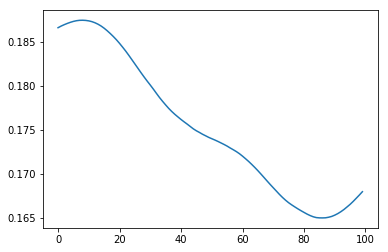

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(test_error_list);

In [47]:
np.min(test_error_list) # 0.17065

0.16499928885243437

In [48]:
alpha_vec[np.argmin(test_error_list)]

13947.092385472735

In [49]:
pipe.steps

[('poly_feat',
  PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
 ('scaler', Scaler(scale_dummies=True)),
 ('model', Ridge(alpha=65536.0, copy_X=True, fit_intercept=True, max_iter=None,
     normalize=False, random_state=None, solver='auto', tol=0.001))]

In [50]:
pipe.steps[2][1].coef_.size

1128

In [51]:
X.shape

(2903, 47)

In [52]:
featurizer = pipe.steps[0][1]
featurizer.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x0 x14',
 'x0 x15',
 'x0 x16',
 'x0 x17',
 'x0 x18',
 'x0 x19',
 'x0 x20',
 'x0 x21',
 'x0 x22',
 'x0 x23',
 'x0 x24',
 'x0 x25',
 'x0 x26',
 'x0 x27',
 'x0 x28',
 'x0 x29',
 'x0 x30',
 'x0 x31',
 'x0 x32',
 'x0 x33',
 'x0 x34',
 'x0 x35',
 'x0 x36',
 'x0 x37',
 'x0 x38',
 'x0 x39',
 'x0 x40',
 'x0 x41',
 'x0 x42',
 'x0 x43',
 'x0 x44',
 'x0 x45',
 'x0 x46',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x1 x14',
 '

In [53]:
feature_coeff_series = pd.Series(pipe.steps[2][1].coef_, index=featurizer.get_feature_names()) # X.columns
feature_coeff_series.sort_values(ascending=False, inplace=True)

In [54]:
X.presMax.corr(X.presMin)

0.967708282761812

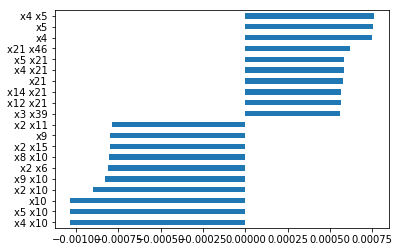

In [55]:
pd.concat([feature_coeff_series.head(10), feature_coeff_series.tail(10)]).sort_values().plot.barh()

In [56]:
X.columns[[4, 10]]

Index(['presMax', 'tmin'], dtype='object')

In [57]:
X.columns[[4, 5]], X.columns[[21, 46]]

(Index(['presMax', 'presMin'], dtype='object'),
 Index(['dow_Tuesday', 'hour_23'], dtype='object'))

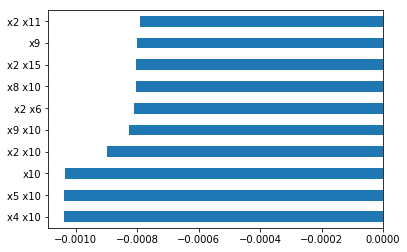

In [58]:
feature_coeff_series.tail(10).sort_values().plot.barh();

# RF

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor

In [102]:
rf = RandomForestRegressor(n_estimators=50, max_depth=6, max_features=0.5, random_state=0)
estimator = TransformedTargetRegressor(regressor=rf, transformer=PowerTransformer())

In [103]:
estimator.fit(X_train, y_train)

TransformedTargetRegressor(check_inverse=True, func=None, inverse_func=None,
              regressor=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
              transformer=PowerTransformer(copy=True, method='yeo-johnson', standardize=True))

In [104]:
y_test_pred = estimator.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred) 
mae

0.1184222973330635

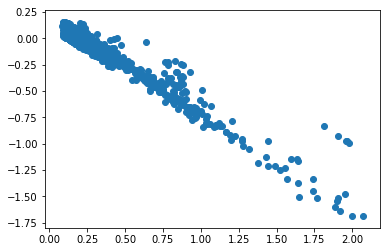

In [105]:
plt.scatter(y_train, estimator.predict(X_train) - y_train);

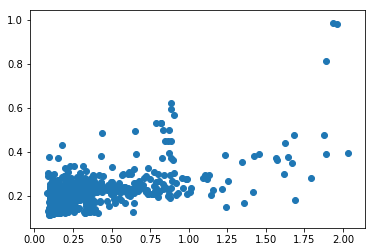

In [106]:
plt.scatter(y_test, y_test_pred);

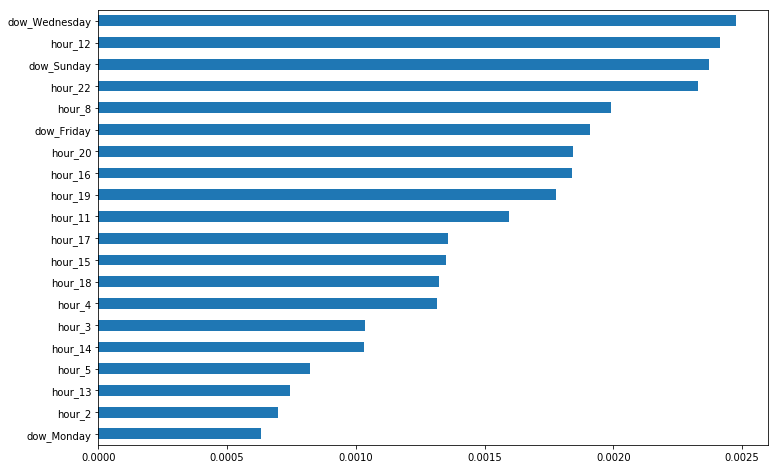

In [115]:
feat_imp = pd.Series(estimator.regressor_.feature_importances_, index=X_test.columns);
feat_imp.sort_values(inplace=True);
feat_imp.head(20).plot.barh(figsize=(12, 8));

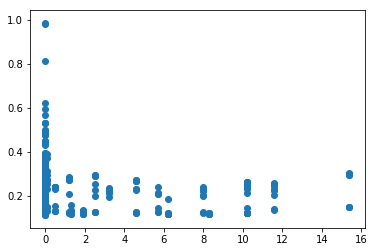

In [66]:
plt.scatter(X_test.prec, y_test_pred)

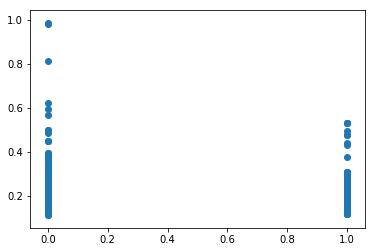

In [67]:
plt.scatter(X_test.dow_Wednesday, y_test_pred)

## CV

In [68]:
from lightgbm import LGBMRegressor

gbm = LGBMRegressor()
gbm.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)

In [69]:
y_test_pred = gbm.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred) 
mae # 0.1048

0.1221664034126174

In [70]:
rf = RandomForestRegressor(n_estimators=50, max_depth=6, max_features=0.5, random_state=0)
estimator = TransformedTargetRegressor(regressor=rf, transformer=PowerTransformer())
estimator.get_params()

{'check_inverse': True,
 'func': None,
 'inverse_func': None,
 'regressor': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
            max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
 'regressor__bootstrap': True,
 'regressor__criterion': 'mse',
 'regressor__max_depth': 6,
 'regressor__max_features': 0.5,
 'regressor__max_leaf_nodes': None,
 'regressor__min_impurity_decrease': 0.0,
 'regressor__min_impurity_split': None,
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2,
 'regressor__min_weight_fraction_leaf': 0.0,
 'regressor__n_estimators': 50,
 'regressor__n_jobs': None,
 'regressor__oob_score': False,
 'regressor__random_state': 0,
 'regressor__verbose': 0,
 'regressor__warm_start': False,
 

In [75]:
from scipy.stats import uniform, randint
params_dict = {'n_estimators': randint(40, 60),
               'max_features': uniform(0.75, 0.15),
               'max_depth': [13]} # randint(10, 15)
params_dict = {'regressor__%s' % key: params_dict[key] for key in params_dict }
params_dict

{'regressor__max_depth': [13],
 'regressor__max_features': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fd514f9db70>,
 'regressor__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fd513f4eb00>}

In [76]:
randint(4, 11).rvs(1000).max()

10

In [77]:
uniform(0.5, 0.45).rvs()

0.6861089447179405

In [78]:
rs_cv = RandomizedSearchCV(estimator=estimator, 
                           param_distributions=params_dict,
                           n_iter=100,
                           cv=3,
                           scoring='neg_mean_absolute_error',
                           n_jobs=2,
                           return_train_score=True,
                           verbose=2,
                           random_state=0)
rs_cv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    7.4s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   30.6s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:   57.7s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=TransformedTargetRegressor(check_inverse=True, func=None, inverse_func=None,
              regressor=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
        ...lse),
              transformer=PowerTransformer(copy=True, method='yeo-johnson', standardize=True)),
          fit_params=None, iid='warn', n_iter=100, n_jobs=2,
          param_distributions={'regressor__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd513f4eb00>, 'regressor__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd514f9db70>, 'regressor__max_depth': [13]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=2)

In [79]:
rs_cv.best_params_

{'regressor__max_depth': 13,
 'regressor__max_features': 0.8075162278238667,
 'regressor__n_estimators': 46}

In [80]:
rs_cv.best_score_

-0.11682173088553889

In [81]:
y_test_pred = rs_cv.best_estimator_.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred) 
mae # 0.1045

0.10450215655455257

In [82]:
import dill

with open('serialized_model', mode='wb') as file:
    dill.dump(rs_cv.best_estimator_, file)

In [83]:
with open('serialized_model', mode='rb') as file:
    loaded_model = dill.load(file)

In [84]:
loaded_model.predict(X_test)

array([0.10686976, 0.10477098, 0.1795569 , ..., 1.62138674, 0.137776  ,
       0.17568817])

In [85]:
results = pd.DataFrame(rs_cv.cv_results_)
results.set_index('rank_test_score', inplace=True)
results.sort_index(inplace=True)
results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
rank_test_score                                                                 
1                     0.356067      0.033444         0.013998        0.005538   
1                     0.258203      0.012213         0.012018        0.008100   
3                     0.258395      0.008455         0.010607        0.003005   
4                     0.407269      0.011354         0.013728        0.001215   
4                     0.342443      0.046172         0.012795        0.003939   

                param_regressor__max_depth param_regressor__max_features  \
rank_test_score                                                            
1                                       13                      0.805134   
1                                       13                      0.807516   
3                                       13                      0.805236   
4                                       13                      0.790501   
4                                       13                      0.805471   

                param_regressor__n_estimators  \
rank_test_score                                 
1                                          46   
1                                          46   
3                                          45   
4                                          42   
4                                          42   

                                                            params  \
rank_test_score                                                      
1                {'regressor__max_depth': 13, 'regressor__max_f...   
1                {'regressor__max_depth': 13, 'regressor__max_f...   
3                {'regressor__max_depth': 13, 'regressor__max_f...   
4                {'regressor__max_depth': 13, 'regressor__max_f...   
4                {'regressor__max_depth': 13, 'regressor__max_f...   

                 split0_test_score  split1_test_score  split2_test_score  \
rank_test_score                                                            
1                        -0.104272          -0.130412          -0.115802   
1                        -0.104272          -0.130412          -0.115802   
3                        -0.104360          -0.130482          -0.115823   
4                        -0.104551          -0.130352          -0.115850   
4                        -0.104551          -0.130352          -0.115850   

                 mean_test_score  std_test_score  split0_train_score  \
rank_test_score                                                        
1                      -0.116822        0.010697           -0.079914   
1                      -0.116822        0.010697           -0.079914   
3                      -0.116881        0.010692           -0.079970   
4                      -0.116911        0.010561           -0.080274   
4                      -0.116911        0.010561           -0.080274   

                 split1_train_score  split2_train_score  mean_train_score  \
rank_test_score                                                             
1                         -0.073502           -0.080690         -0.078035   
1                         -0.073502           -0.080690         -0.078035   
3                         -0.073653           -0.080839         -0.078154   
4                         -0.073871           -0.080671         -0.078272   
4                         -0.073871           -0.080671         -0.078272   

                 std_train_score  
rank_test_score                   
1                       0.003221  
1                       0.003221  
3                       0.003202  
4                       0.003116  
4                       0.003116

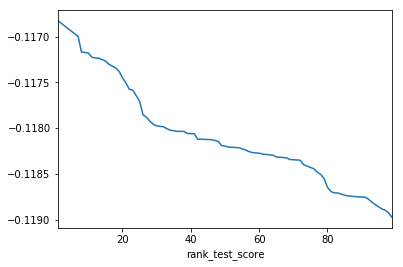

In [86]:
results.mean_test_score.plot();

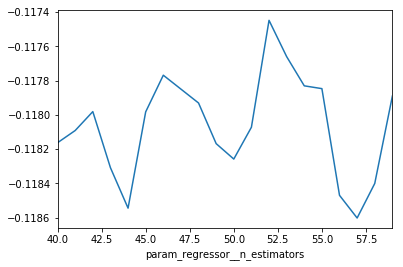

In [87]:
results.groupby('param_regressor__n_estimators').mean_test_score.mean().plot();

/home/infinitemonkeys/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=13.0, right=13.0
  ax.set_xlim(left, right)


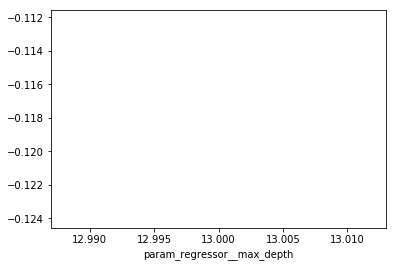

In [88]:
results.groupby('param_regressor__max_depth').mean_test_score.mean().plot();

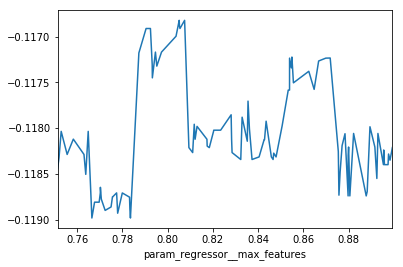

In [89]:
results.groupby('param_regressor__max_features').mean_test_score.mean().plot();

In [90]:
N_QUANTS = 5
results['param_regressor__max_features_quants_'] = pd.qcut(results.param_regressor__max_features, 
                                                            N_QUANTS, 
                                                            labels=['quants_%d' % d for d in range(N_QUANTS)])
results['param_regressor__n_estimators_quants_'] = pd.qcut(results.param_regressor__n_estimators, 
                                                            N_QUANTS,
                                                            labels=['quants_%d' % d for d in range(N_QUANTS)])

In [91]:
pd.qcut(results.param_regressor__n_estimators, 
                                                            N_QUANTS).unique()

[(45.0, 49.0], (43.0, 45.0], (39.999, 43.0], (49.0, 54.2], (54.2, 59.0]]
Categories (5, interval[float64]): [(39.999, 43.0] < (43.0, 45.0] < (45.0, 49.0] < (49.0, 54.2] < (54.2, 59.0]]

In [92]:
pd.qcut(results.param_regressor__max_features, 
                                                            N_QUANTS).unique()

[(0.78, 0.812], (0.843, 0.876], (0.812, 0.843], (0.876, 0.899], (0.75, 0.78]]
Categories (5, interval[float64]): [(0.75, 0.78] < (0.78, 0.812] < (0.812, 0.843] < (0.843, 0.876] < (0.876, 0.899]]

In [93]:
results['param_regressor__n_estimators_quants_'] = pd.qcut(results.param_regressor__n_estimators, 
                                                            N_QUANTS,
                                                            labels=['quants_%d' % d for d in range(N_QUANTS)])

In [94]:
pivot_table = pd.pivot_table(results, columns=['param_regressor__max_features_quants_'],
               values='mean_test_score', 
               index=['param_regressor__n_estimators_quants_'])

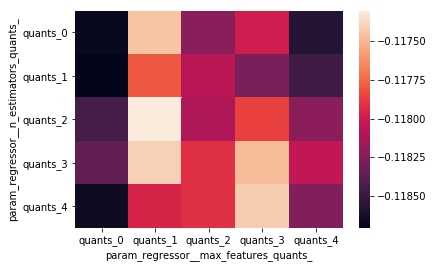

In [95]:
import seaborn as sns

sns.heatmap(pivot_table)

In [ ]:
# plt.plot(y_test)

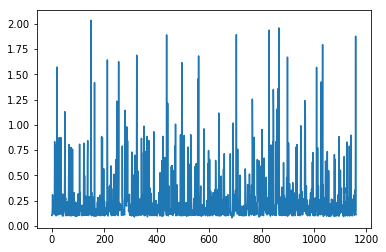

In [97]:
plt.plot(y_test.values)

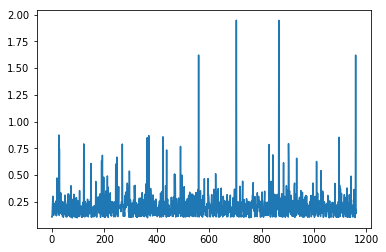

In [99]:
plt.plot(y_test_pred)